In [478]:
# Import required models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from pathlib import Path
from sklearn.datasets import make_classification
from sklearn.svm import SVC

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Split the Data into Training and Testing Sets

In [470]:
# Read csv files and display the DataFrame
data_red_train = Path('Resources/red_train_norm.csv')
df_red_train = pd.read_csv(data_red_train, sep = ',')

data_red_test = Path('Resources/red_test_norm.csv')
df_red_test = pd.read_csv(data_red_test, sep = ',')

display(df_red_train.head())
display(df_red_test.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.05671,0.883656,0.31,1.442250,0.441400,2.843867,4.326749,1.00020,3.48,0.904504,2.263702,6
1,1.82716,0.594392,0.40,1.118689,0.404124,3.434143,5.484807,0.99120,3.25,0.838721,2.283051,6
2,2.21722,0.730614,0.47,1.216440,0.490487,1.817121,2.410142,0.99820,3.30,0.908560,2.139975,6
3,2.06456,0.881516,0.26,1.169607,0.444796,2.519842,2.843867,0.99694,3.32,0.777498,2.110454,5
4,2.01653,0.730614,0.49,1.320006,0.462607,3.608826,5.104469,0.99790,3.38,0.996655,2.139975,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.974681,0.56,0.08,1.357209,0.484881,2.410142,3.583048,0.9971,3.24,0.870659,2.125317,6
1,1.983192,0.50,0.17,1.169607,0.434448,2.758924,4.672329,0.9960,3.39,0.782974,2.117912,5
2,2.203575,0.67,0.22,1.392477,0.474746,2.571282,3.239612,1.0004,3.28,0.993288,2.147229,6
3,2.040828,0.46,0.31,1.310371,0.427266,3.174802,3.870877,0.9980,3.33,0.814325,2.139975,5
4,1.885204,0.46,0.24,1.193483,0.425432,2.620741,3.239612,0.9948,3.39,0.843433,2.196689,6


In [471]:
# Define a function that maps values from 1-6 and 7-10.
def map_wine_quality(value):
    if value >= 1 and value <= 6:
        return 0
    elif value >= 7 and value <= 10:
        return 1
    else:
        return None

In [472]:
# use the apply method to create a new column based on the existing column
df_red_train['wine quality'] = df_red_train['quality'].apply(map_wine_quality)
df_red_test['wine quality'] = df_red_test['quality'].apply(map_wine_quality)

In [457]:
# Drop 'quality' column
df_red_train = df_red_train.drop('quality', axis=1)

df_red_test = df_red_test.drop('quality', axis=1)

In [473]:
# Drop 'quality' column and low value features
df_red_train = df_red_train.drop(['quality', 'free sulfur dioxide',
                                 'total sulfur dioxide', 'fixed acidity',
                                 'density', 'citric acid', 'residual sugar'], axis=1)

df_red_test = df_red_test.drop(['quality','free sulfur dioxide',
                                 'total sulfur dioxide', 'fixed acidity',
                                 'density', 'citric acid', 'residual sugar'], axis=1)

In [474]:
# Split the data into X and y
X_train = df_red_train.drop('wine quality', axis=1)
y_train = df_red_train['wine quality']
X_test = df_red_test.drop('wine quality', axis=1)
y_test = df_red_test['wine quality']

## Create a Support Vector Machine Algorithm

In [475]:
# Create a SVM classifier
clf = svm.SVC(C=10, kernel='linear')

# Train the classifier on the training set
model = clf.fit(X_train, y_train)

In [479]:
# Save the trained model to a file
filename = 'Pickle/svm_model_red.sav'
pickle.dump(model, open(filename, 'wb'))

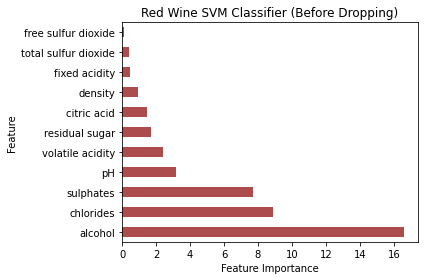

In [273]:
# get feature importances from SVM model
coef = abs(model.coef_)
coef_series = pd.Series(coef[0], index=X_train.columns)
coef_series_sorted = coef_series.sort_values(ascending=False)

# create horizontal bar chart of feature importances
ax = coef_series_sorted.plot(kind='barh', color='darkred', alpha=0.7)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.set_title('Red Wine SVM Classifier (Before Dropping)')
plt.tight_layout()
# plt.savefig('Images/SVM_Feature_Importance_Red_Before.jpg', dpi=300)

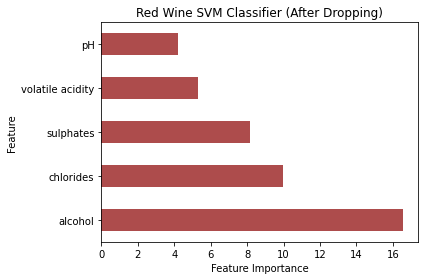

In [327]:
# get feature importances from SVM model
coef = abs(model.coef_)
coef_series = pd.Series(coef[0], index=X_train.columns)
coef_series_sorted = coef_series.sort_values(ascending=False)

# create horizontal bar chart of feature importances
ax = coef_series_sorted.plot(kind='barh', color='darkred', alpha=0.7)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.set_title('Red Wine SVM Classifier (After Dropping)')
plt.tight_layout()
# plt.savefig('Images/SVM_Feature_Importance_Red_After', dpi=300)

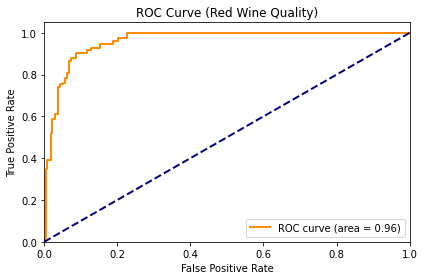

In [468]:
# Generate ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Red Wine Quality)')
plt.legend(loc="lower right")
plt.tight_layout()
# plt.savefig('Images/ROC_Red', dpi=300)
plt.show()

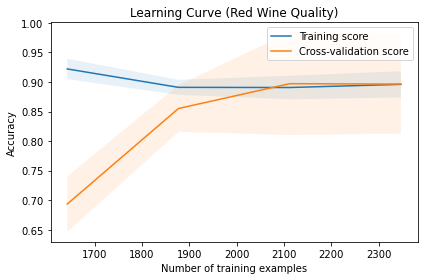

In [477]:
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

# Compute the mean and standard deviation of the train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.legend(loc='best')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Red Wine Quality)')
plt.tight_layout()
# plt.savefig('Images/Learning_Curve_Red', dpi=300)
plt.show()

In [460]:
# Use the model to make predictions on the testing data
training_predictions = model.predict(X_train)
testing_predictions = clf.predict(X_test)

### Before Dropping Low Value Features

In [461]:
# Create and save the balanced accuracy score
training_accuracy_score = balanced_accuracy_score(y_train, training_predictions)

# Print the balance accuracy score for the training data
training_accuracy_score

0.8911042944785277

In [462]:
# Create and save the balanced accuracy score
testing_accuracy_score = balanced_accuracy_score(y_test, testing_predictions)

# Print the balance accuracy score for the testing data
testing_accuracy_score

0.8852459016393442

In [463]:
# Create and save the confusion matrix for the testing data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the testing data
print(training_matrix)

[[1778  178]
 [ 124  854]]


In [464]:
# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[402  86]
 [ 13 231]]


In [465]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1956
           1       0.83      0.87      0.85       978

    accuracy                           0.90      2934
   macro avg       0.88      0.89      0.89      2934
weighted avg       0.90      0.90      0.90      2934



In [466]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       488
           1       0.73      0.95      0.82       244

    accuracy                           0.86       732
   macro avg       0.85      0.89      0.86       732
weighted avg       0.89      0.86      0.87       732



### After Dropping Low Value Features

In [445]:
# Create and save the balanced accuracy score
training_accuracy_score = balanced_accuracy_score(y_train, training_predictions)

# Print the balance accuracy score for the training data
training_accuracy_score

0.890081799591002

In [446]:
# Create and save the balanced accuracy score
testing_accuracy_score = balanced_accuracy_score(y_test, testing_predictions)

# Print the balance accuracy score for the testing data
testing_accuracy_score

0.8719262295081966

In [447]:
# Create and save the confusion matrix for the testing data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the testing data
print(training_matrix)

[[1770  186]
 [ 122  856]]


In [448]:
# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[371 117]
 [  4 240]]


In [449]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1956
           1       0.82      0.88      0.85       978

    accuracy                           0.90      2934
   macro avg       0.88      0.89      0.88      2934
weighted avg       0.90      0.90      0.90      2934



In [450]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       488
           1       0.67      0.98      0.80       244

    accuracy                           0.83       732
   macro avg       0.83      0.87      0.83       732
weighted avg       0.88      0.83      0.84       732

